In [1]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 6.1.4
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# 6.1.4
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.4
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-45.147056773598166 22.296485842696626
-43.722659688773746 64.62035121155031
-57.90156601804022 123.93784141386055
18.133885179184205 88.76491343025225
13.028777130372049 -75.84986834734673
34.80683194282426 -16.141915771069534
-9.211388465589494 133.78568521498676
-30.57577303250413 -136.03543721405367
-48.70239118253096 -152.91118094967925
-1.0516392474113303 52.56463422094453
26.11086208116646 -76.08203240043903
45.96458350434983 -46.33024811723351
76.02214599567327 176.80944945732767
84.98590235833245 3.466567518376337
8.453882522444403 148.98403543560636
73.12544943822977 28.611747890016517
46.354895370660586 -149.3656493178187
-26.883089479622306 94.85449981532054
-37.15735711727741 -177.89188592045292
25.458444379662083 -162.28432208698138
-46.56983009015384 172.15922757229714
33.826479219722685 30.934866257152038
71.98450573456194 -176.17732009141938
5.610034870274788 -63.613047806961106
52.78785054881274 -164.84318293694852
7.508964496725767 98.3372483040086
72.90337213377686 

In [5]:
# 6.1.5
from citipy import citipy

In [6]:
# 6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [7]:
# 6.2.6
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# 6.2.6
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7c9061425a68cba1e764fa819ffc117


In [9]:
# 6.2.6
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7c9061425a68cba1e764fa819ffc117&q=Boston


In [10]:
# 6.2.6
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# 6.2.6
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# 6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | paradwip
City not found. Skipping...
Processing Record 5 of Set 1 | puerto colombia
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | maningrida
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | dunmore town
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | leningradskiy
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | mehamn
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | waitati
Processing Record 22

Processing Record 38 of Set 4 | menongue
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | pitimbu
Processing Record 41 of Set 4 | cuiaba
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | yumen
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | pangai
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | fuerte olimpo
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | taywarah
Processing Record 3 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 5 | japura
Processing Record 5 of Set 5 | kuala terengganu
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 of Set 5 | korla
Processing Record 9 of Set 5 | vagur
Processin

Processing Record 24 of Set 8 | vangaindrano
Processing Record 25 of Set 8 | ugoofaaru
Processing Record 26 of Set 8 | muyezerskiy
Processing Record 27 of Set 8 | leua
Processing Record 28 of Set 8 | pascagoula
Processing Record 29 of Set 8 | bhan
Processing Record 30 of Set 8 | nokaneng
Processing Record 31 of Set 8 | valmiera
Processing Record 32 of Set 8 | lubuagan
Processing Record 33 of Set 8 | matamoros
Processing Record 34 of Set 8 | nadym
Processing Record 35 of Set 8 | pocone
Processing Record 36 of Set 8 | troitsko-pechorsk
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | linjiang
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | severo-yeniseyskiy
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | nchelenge
Processing Record 43 of Set 8 | shieli
Processing Record 44 of Set 8 | bonthe
Processing Record 45 of Set 8 | odessa
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | dong

Processing Record 20 of Set 12 | nova vicosa
Processing Record 21 of Set 12 | twin falls
Processing Record 22 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 23 of Set 12 | samusu
City not found. Skipping...
Processing Record 24 of Set 12 | frutal
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | port-gentil
Processing Record 27 of Set 12 | gravdal
Processing Record 28 of Set 12 | moerai
Processing Record 29 of Set 12 | karabash
Processing Record 30 of Set 12 | miandrivazo
Processing Record 31 of Set 12 | boca do acre
Processing Record 32 of Set 12 | havre
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | visby
Processing Record 35 of Set 12 | lephepe
City not found. Skipping...
Processing Record 36 of Set 12 | aykhal
Processing Record 37 of Set 12 | mahibadhoo
Processing Record 38 of Set 12 | bilma
Processing Record 39 of Set 12 | bay roberts
Processing Record 40 of Set 12 | zhanatas
City not found. Skipping...
Proc

In [15]:
# 6.2.6
len(city_data)

589

In [16]:
# 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,66.25,42,2,6.55,ZA,2022-06-03 13:41:04
1,Saint-Philippe,-21.3585,55.7679,76.59,72,19,10.45,RE,2022-06-03 13:41:05
2,Albany,42.6001,-73.9662,69.58,58,46,1.01,US,2022-06-03 13:38:07
3,Puerto Colombia,10.9878,-74.9547,82.49,71,15,3.29,CO,2022-06-03 13:41:05
4,Camacha,33.0833,-16.3333,69.22,56,20,14.97,PT,2022-06-03 13:41:05
5,Maningrida,-12.0667,134.2667,77.13,88,10,8.43,AU,2022-06-03 13:41:06
6,Rikitea,-23.1203,-134.9692,75.88,72,100,12.77,PF,2022-06-03 13:41:06
7,Mataura,-46.1927,168.8643,46.47,95,62,3.11,NZ,2022-06-03 13:41:06
8,Victoria,22.2855,114.1577,86.38,84,93,11.99,HK,2022-06-03 13:38:14
9,Dunmore Town,25.5000,-76.6500,75.74,74,100,14.81,BS,2022-06-03 13:41:06


In [17]:
# 6.2.7
new_column_order = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,66.25,42,2,6.55,ZA,2022-06-03 13:41:04
1,Saint-Philippe,-21.3585,55.7679,76.59,72,19,10.45,RE,2022-06-03 13:41:05
2,Albany,42.6001,-73.9662,69.58,58,46,1.01,US,2022-06-03 13:38:07
3,Puerto Colombia,10.9878,-74.9547,82.49,71,15,3.29,CO,2022-06-03 13:41:05
4,Camacha,33.0833,-16.3333,69.22,56,20,14.97,PT,2022-06-03 13:41:05
5,Maningrida,-12.0667,134.2667,77.13,88,10,8.43,AU,2022-06-03 13:41:06
6,Rikitea,-23.1203,-134.9692,75.88,72,100,12.77,PF,2022-06-03 13:41:06
7,Mataura,-46.1927,168.8643,46.47,95,62,3.11,NZ,2022-06-03 13:41:06
8,Victoria,22.2855,114.1577,86.38,84,93,11.99,HK,2022-06-03 13:38:14
9,Dunmore Town,25.5000,-76.6500,75.74,74,100,14.81,BS,2022-06-03 13:41:06


In [18]:
# 6.2.7
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# 6.3.1
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654264549.7976165

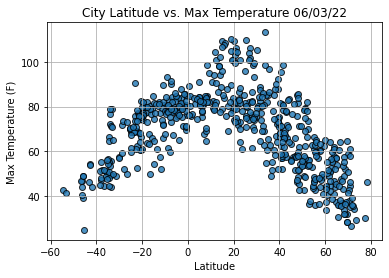

In [21]:
# 6.3.1
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

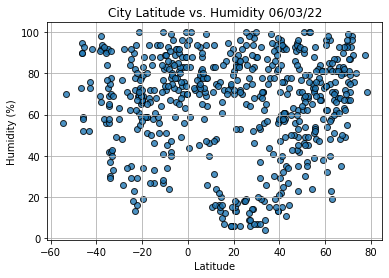

In [22]:
# 6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

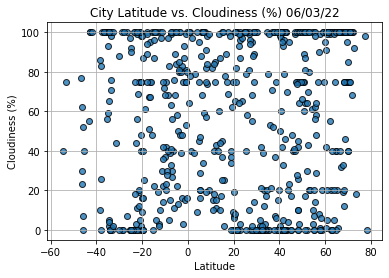

In [23]:
# 6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

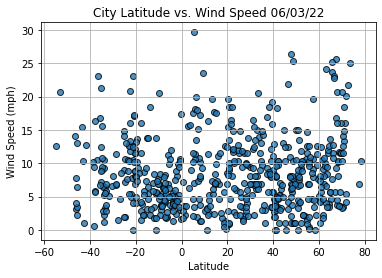

In [24]:
# 6.3.4
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# 6.4.2
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
# 6.4.2
index13 = city_data_df.loc[13]
index13

City                       Mehamn
Lat                       71.0357
Lng                       27.8492
Max Temp                    44.51
Humidity                       79
Cloudiness                    100
Wind Speed                   13.4
Country                        NO
Date          2022-06-03 13:41:07
Name: 13, dtype: object

In [44]:
# 6.4.2
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
584    False
585    False
586    False
587    False
588     True
Name: Lat, Length: 589, dtype: bool

In [45]:
# 6.4.2
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.6001,-73.9662,69.58,58,46,1.01,US,2022-06-03 13:38:07
3,Puerto Colombia,10.9878,-74.9547,82.49,71,15,3.29,CO,2022-06-03 13:41:05
4,Camacha,33.0833,-16.3333,69.22,56,20,14.97,PT,2022-06-03 13:41:05
8,Victoria,22.2855,114.1577,86.38,84,93,11.99,HK,2022-06-03 13:38:14
9,Dunmore Town,25.5000,-76.6500,75.74,74,100,14.81,BS,2022-06-03 13:41:06
...,...,...,...,...,...,...,...,...,...
580,Atar,20.5169,-13.0499,99.59,18,100,13.51,MR,2022-06-03 13:55:26
581,Takayama,36.1333,137.2500,49.10,99,21,3.78,JP,2022-06-03 13:55:26
582,Vytegra,61.0064,36.4481,51.66,98,100,6.46,RU,2022-06-03 13:55:27
583,Eureka,40.8021,-124.1637,58.68,84,100,3.60,US,2022-06-03 13:55:27


In [46]:
# 6.4.2
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

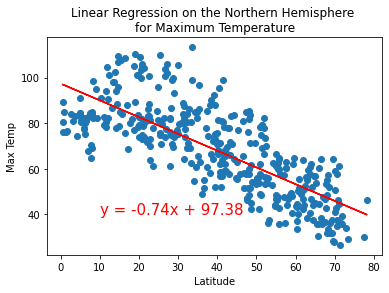

In [57]:
# 6.4.2
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

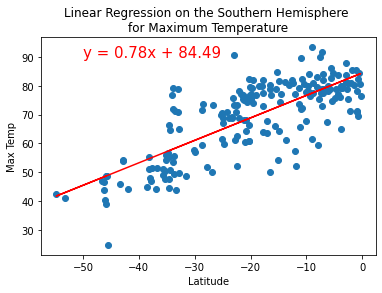

In [58]:
# 6.4.2
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

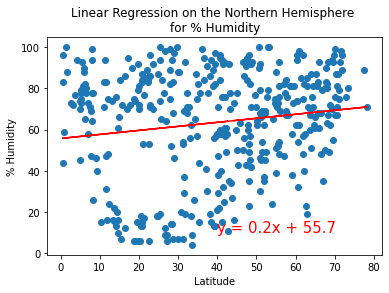

In [59]:
# 6.4.3
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

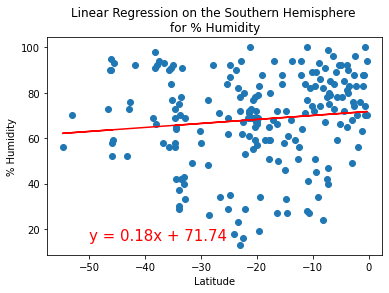

In [60]:
# 6.4.3
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

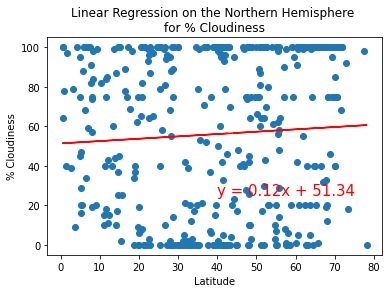

In [61]:
# 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,25))

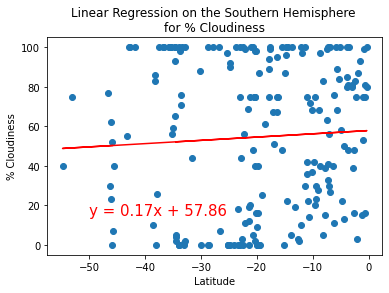

In [62]:
# 6.4.4
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

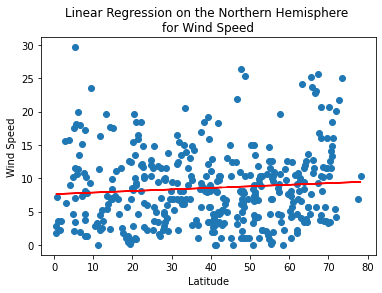

In [63]:
# 6.4.5
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

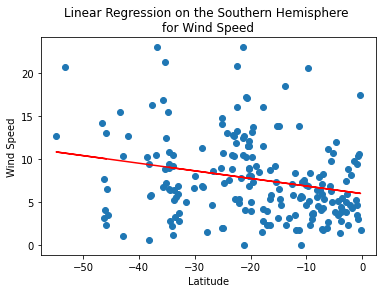

In [65]:
# 6.4.5
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))